In [1]:
from crawl_kis_and_nice_module import import_from_mysql

import_df = import_from_mysql(username='multi',
                            password='Campus123!',
                            host_ip='15-152-211-160',
                            database_name='Data_Warehouse',
                            desired_table_name='credit_rank')

import_df

,corp,stock_code,sector,year,kis_bond_type,kis_rank,nice_bond_type,nice_rank,rank
0,AJ네트웍스,95570,서비스업,2019,SB,BBB+,None,None,BBB
1,AJ네트웍스,95570,서비스업,2020,SB,BBB+,None,None,BBB
2,AJ네트웍스,95570,서비스업,2021,PP,BBB+,None,None,BBB
3,AJ네트웍스,95570,서비스업,2022,PP,BBB+,None,None,BBB
4,CJ,1040,기타금융,2018,None,None,SB,AA-,AA-
...,...,...,...,...,...,...,...,...,...
1022,BNK금융지주,138930,None,2019,SB,AAA,SB,AAA,AAA
1023,BNK금융지주,138930,None,2020,SB,AAA,SB,AAA,AAA
1024,BNK금융지주,138930,None,2021,SB,AAA,SB,AAA,AAA
1025,BNK금융지주,138930,None,2022,COCOT1,AA-,SB,AAA,AA-


In [5]:
# preprocess
temp_df = import_df.copy()[['corp', 'sector', 'year', 'rank']]

temp_df['rank'] = temp_df['rank'].replace('JB', 1 \
                                            ).replace('BBB', 2 \
                                            ).replace('A-', 3 \
                                            ).replace('A', 4 \
                                            ).replace('A+', 5 \
                                            ).replace('AA-', 6 \
                                            ).replace('AA', 7 \
                                            ).replace('AA+', 8 \
                                            ).replace('AAA', 9)
  
temp_df.rename(columns = {'rank' : '등급'}, inplace = True)

temp_df


,corp,sector,year,등급
0,AJ네트웍스,서비스업,2019,2
1,AJ네트웍스,서비스업,2020,2
2,AJ네트웍스,서비스업,2021,2
3,AJ네트웍스,서비스업,2022,2
4,CJ,기타금융,2018,6
...,...,...,...,...
1022,BNK금융지주,None,2019,9
1023,BNK금융지주,None,2020,9
1024,BNK금융지주,None,2021,9
1025,BNK금융지주,None,2022,6


In [6]:
# 패키지
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 출력
import matplotlib
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rc('font', family='Malgun Gothic')

# 마이너스 부호
matplotlib.rcParams['axes.unicode_minus'] = False

# ggplot
plt.style.use ('ggplot')

# 데이터 시각화 1

- 최근 5년 간 KOSPI에 상장된 기업은 대체로 A 이상의 신용평가등급을 보이는 것으로 확인
- 신용평가등급은 신용평가년도와 관계없이 일정한 비율을 보이는 것으로 확인
- KOSPI에 상장된 기업은 2022년에 가장 많은 신용평가를 받았으며, 2019년에 가장 적은 신용평가를 받은 것으로 확인

year
2021    226
2020    217
2022    213
2019    197
2018    174
dtype: int64


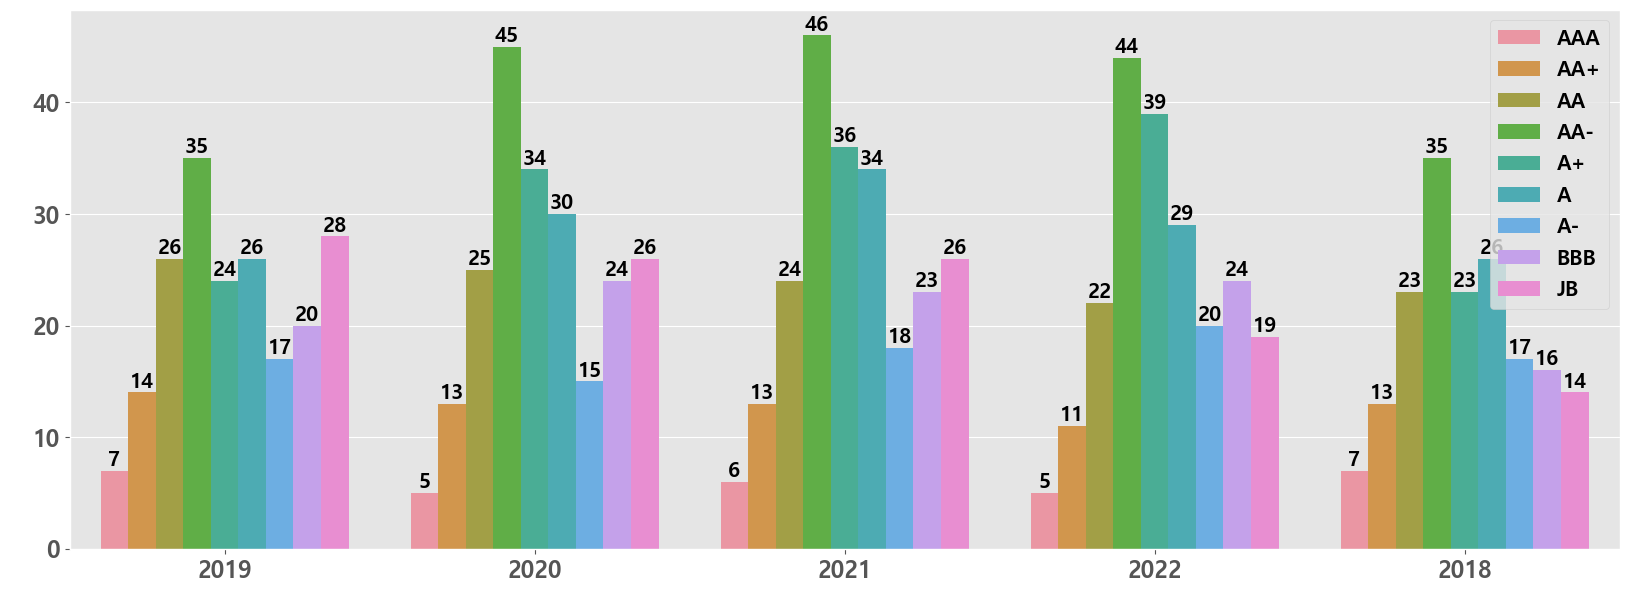

In [7]:
# visualization 1
print(temp_df.value_counts('year'))

rank_list = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB', 'JB']

plt.figure(figsize=(20, 7))

counts = sns.countplot(data = temp_df,
              x = 'year',
              hue = '등급',
              hue_order = [9, 8, 7, 6, 5, 4, 3, 2, 1])

plt.legend(rank_list, loc='upper right', prop={'size': 15, 'weight' : 'bold'})
plt.xticks(size = 17, fontweight = 'bold')
plt.yticks(size = 17, fontweight = 'bold')
plt.xlabel(' ')
plt.ylabel(' ')

for i, p in enumerate(counts.patches):
    counts.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height(), '.0f'), ha='center', va='bottom', fontsize = 15, fontweight = 'bold')

plt.show()

# 데이터 시각화 2

- 최근 5년 간 KOSPI에 상장된 기업 중 신용평가를 가장 많이 받은 업종은 '화학'이며, '유통업', '기타금융', '전기전자', '운수장비' 순으로 많은 것으로 나타났다.
- '화학' 기업은 대체적으로 A등급을 받은 것으로 확인되었으며, '유통업' 기업은 대게 'AA'등급을 받은 것으로 확인되었다.
- 신용평가 시 위험 고려대상에 해당하는 'F등급'(B 미만)에 해당하는 기업은 '운수창고업', '전기전자', '유통업', '운수장비', '의약품', '종이목재'에 속하는 것으로 나타났다.

sector
화학             135
유통업             89
기타금융            73
전기전자            73
운수장비            72
서비스업            70
음식료품            63
의약품             45
철강금속            38
기계              36
운수창고업           32
건설업             29
전기가스업           22
섬유의복            19
종이목재            19
비금속광물           18
통신업             15
농업, 임업 및 어업      5
기타제조업            2
dtype: int64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

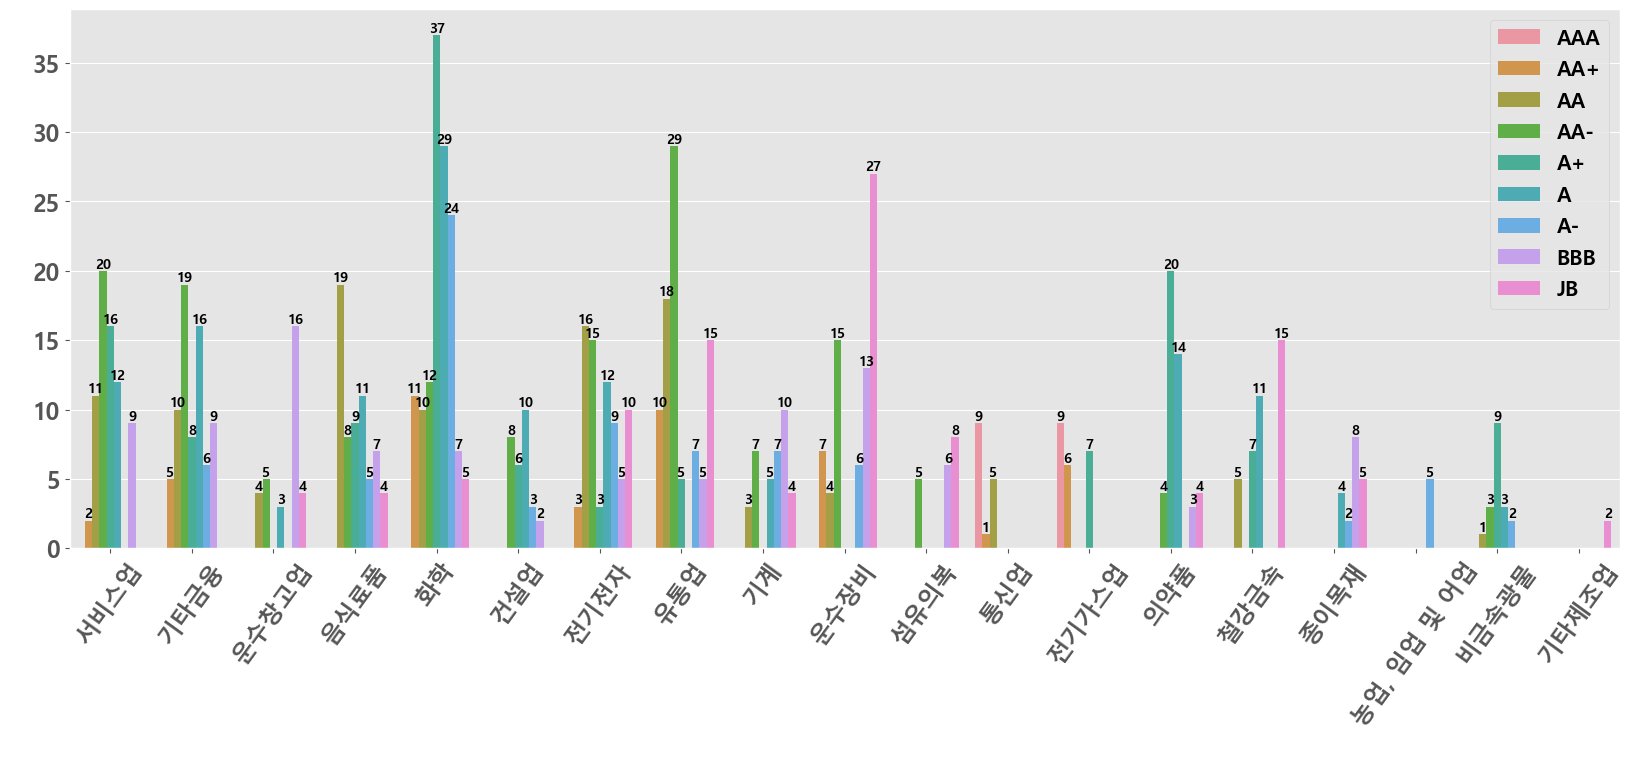

In [10]:
# visualization 2
print(temp_df.value_counts('sector'))

rank_list = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB', 'JB']

plt.figure(figsize=(20, 7))

counts = sns.countplot(data = temp_df,
              x = 'sector',
              hue = '등급',
              hue_order = [9, 8, 7, 6, 5, 4, 3, 2, 1])

plt.legend(rank_list, loc='upper right', prop={'size': 15, 'weight' : 'bold'})
plt.xticks(size = 17, fontweight = 'bold', rotation = 54)
plt.yticks(size = 17, fontweight = 'bold')
plt.xlabel(' ')
plt.ylabel(' ')

for i, p in enumerate(counts.patches):
    counts.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height(), '.0f'), ha='center', va='bottom', fontsize = 10, fontweight = 'bold')

plt.show()